# Problem Statement



Goal is to create a model which will be able to predict all positive class as positive only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Use to avoid plt.show()
%matplotlib inline     
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
df = pd.read_csv("Client.csv")
df

,Unnamed: 0,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,5,1,0.0,1.0,0.0,50.0,34.940
1,1,3,0,1.0,0.0,0.0,18.0,0.891
2,2,66,0,0.0,1.0,0.0,5.0,0.330
3,3,70,1,0.0,1.0,1.0,31.0,0.037
4,4,96,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...,...
1335,1335,34100,0,0.0,1.0,0.0,NaN,0.576
1336,1336,34110,1,1.0,1.0,0.0,46.0,3.705
1337,1337,34113,0,1.0,1.0,0.0,39.0,0.099
1338,1338,34145,1,1.0,0.0,0.0,8.0,3.177


# EDA

In [3]:
#for drop column which are not in use
df.drop(columns=['Unnamed: 0','CASENUM'],inplace=True)

In [4]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038


In [5]:
df.shape

(1340, 6)

In [6]:
#for null values
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

# Missing Value Imputation

In [7]:
# for fill null values
from sklearn.impute import SimpleImputer

In [8]:
si = SimpleImputer(strategy='most_frequent')
#here we used mode to fill null values because the data is in categorical form

In [9]:
df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4])

In [10]:
df['CLMAGE'].fillna(df['CLMAGE'].mean(),inplace=True)     #fillna inside pandas function
# here we used mean because the column contains continuous data

In [11]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# Splitting data into training and testing set.

In [12]:
# for split data into training and testing part
from sklearn.model_selection import train_test_split

In [13]:
df.head(2)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891


In [14]:
#to store target column in different variable which is y
x = df.iloc[:,1:]
y = df['ATTORNEY']

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)  # random state to get fixed xtrain values

In [16]:
xtrain  

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
216,1.0,1.0,0.0,10.000000,3.435
731,0.0,1.0,0.0,30.000000,4.014
866,1.0,1.0,0.0,30.000000,0.300
202,1.0,1.0,0.0,18.000000,3.086
820,0.0,1.0,0.0,40.000000,0.310
...,...,...,...,...,...
715,0.0,1.0,0.0,13.000000,6.979
905,0.0,1.0,0.0,28.414422,3.330
1096,0.0,1.0,0.0,50.000000,3.095
235,1.0,1.0,0.0,17.000000,1.619


# Model Building

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# stored it in one varibale
lg = LogisticRegression()

In [19]:
#train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [20]:
# length of test data
len(xtest)

268

In [21]:
#length of predicted
len(ypred)

268

# Model Evaluation

In [22]:
# to print actual and predicted data for comparison
print('Actual Y:', ytest[:25].values)
print('Predict Y:', ypred[:25])

Actual Y: [0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0]
Predict Y: [0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [23]:
#to get values or accuracy
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       140
           1       0.68      0.55      0.61       128

    accuracy                           0.66       268
   macro avg       0.66      0.66      0.65       268
weighted avg       0.66      0.66      0.66       268



In [25]:
confusion_matrix(ytest,ypred)

array([[106,  34],
       [ 57,  71]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

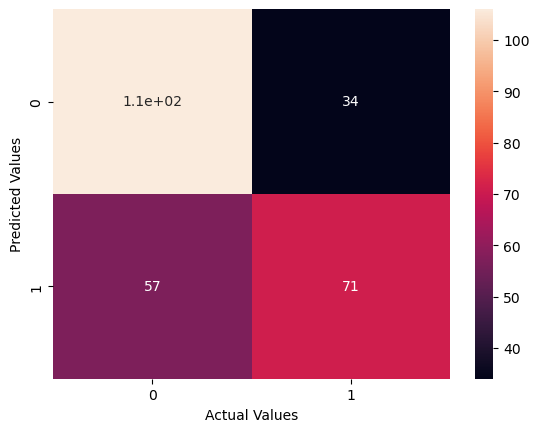

In [26]:
# heatmap is also used to get confusion matrix values
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [27]:
print(ytest[:25].values)
print(ypred[:25])

[0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


# Threeshold Selection

In [28]:
lg.predict_proba(xtest)

array([[6.98844643e-01, 3.01155357e-01],
       [6.86182830e-01, 3.13817170e-01],
       [5.47369649e-01, 4.52630351e-01],
       [6.07956362e-01, 3.92043638e-01],
       [3.98302131e-01, 6.01697869e-01],
       [6.28380117e-01, 3.71619883e-01],
       [7.10495844e-01, 2.89504156e-01],
       [4.51245912e-01, 5.48754088e-01],
       [6.66887690e-01, 3.33112310e-01],
       [6.66730957e-01, 3.33269043e-01],
       [5.53154363e-01, 4.46845637e-01],
       [6.08463094e-01, 3.91536906e-01],
       [6.03492620e-01, 3.96507380e-01],
       [4.16484522e-01, 5.83515478e-01],
       [6.67885298e-01, 3.32114702e-01],
       [4.31416304e-01, 5.68583696e-01],
       [5.68814341e-01, 4.31185659e-01],
       [5.34157732e-01, 4.65842268e-01],
       [6.43301571e-01, 3.56698429e-01],
       [6.71259851e-01, 3.28740149e-01],
       [6.82943384e-01, 3.17056616e-01],
       [5.90994499e-01, 4.09005501e-01],
       [3.67403384e-01, 6.32596616e-01],
       [5.88743726e-01, 4.11256274e-01],
       [5.953257

In [29]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.30115536, 0.31381717, 0.45263035, 0.39204364, 0.60169787,
       0.37161988, 0.28950416, 0.54875409, 0.33311231, 0.33326904,
       0.44684564, 0.39153691, 0.39650738, 0.58351548, 0.3321147 ,
       0.5685837 , 0.43118566, 0.46584227, 0.35669843, 0.32874015,
       0.31705662, 0.4090055 , 0.63259662, 0.41125627, 0.40467429,
       0.36389266, 0.29404794, 0.37997549, 0.40755736, 0.31549504,
       0.41328429, 0.35821288, 0.42555794, 0.73207791, 0.76502096,
       0.39645082, 0.64939343, 0.53920255, 0.34755192, 0.30835909,
       0.32242488, 0.99990442, 0.48492752, 0.47528985, 0.43849638,
       0.61128046, 0.26716726, 0.31887669, 0.37436201, 0.41833827,
       0.42845939, 0.31741669, 0.31495908, 0.4216289 , 0.45350308,
       0.37320571, 0.72488941, 0.34390722, 0.83844421, 0.34175787,
       0.58948658, 0.6507207 , 0.37161988, 0.9147999 , 0.60348565,
       0.86905072, 0.33934221, 0.88374345, 0.54375741, 0.85833479,
       0.74079853, 0.6604145 , 0.311027  , 0.41466323, 0.64133

In [30]:
# for Calculating Threeshold we use roc auc curve
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

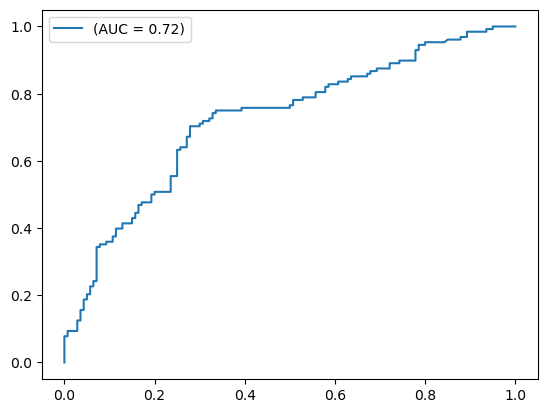

In [31]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()
#plot gives area under curve if auc value is more then we can say that model is good

In [32]:
auc

0.7235770089285714

In [33]:
threshold

array([2.        , 1.        , 0.9147999 , 0.91400156, 0.90858261,
       0.86905072, 0.84997734, 0.83844421, 0.76679258, 0.76504242,
       0.75450441, 0.75384475, 0.74564914, 0.74079853, 0.72488941,
       0.72155326, 0.70515074, 0.6960694 , 0.65112027, 0.6507207 ,
       0.64939343, 0.64107846, 0.63259662, 0.62362596, 0.61779475,
       0.61574579, 0.60505094, 0.60348565, 0.60071892, 0.59318246,
       0.58905632, 0.58401651, 0.58084824, 0.5685837 , 0.56493454,
       0.56484388, 0.56404775, 0.56239559, 0.54375741, 0.53920255,
       0.53525353, 0.52627754, 0.5029419 , 0.48492752, 0.45350308,
       0.45263035, 0.44684564, 0.44508273, 0.43834118, 0.43691415,
       0.43118566, 0.42643525, 0.42571735, 0.42555794, 0.42526565,
       0.42323541, 0.4216289 , 0.42104013, 0.41833827, 0.4178506 ,
       0.41603527, 0.41125627, 0.41007117, 0.39204364, 0.39153691,
       0.39148425, 0.38498263, 0.38325562, 0.38056266, 0.37997549,
       0.3790604 , 0.37402069, 0.37320571, 0.37161988, 0.36744

In [34]:
len(threshold)

111

In [35]:

accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)  #if probability is greater than threeshold it written 1 ow 0
    accuracy.append(accuracy_score(ytest,ypred))  #to write or append accuracy in empty box

final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)   # pd.concat is used to join two series #use axis for get values in column
final_threshold.columns = ['Threshold','Accuracy'] #column name

In [36]:

#accuracy in increasing order
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
50,0.431186,0.708955
51,0.426435,0.705224
59,0.417851,0.705224
53,0.425558,0.705224
49,0.436914,0.701493
...,...,...
106,0.297394,0.507463
107,0.295048,0.503731
108,0.294048,0.503731
109,0.289504,0.500000


In [37]:
from sklearn.preprocessing import binarize #for chnge the threshold value 

In [38]:
proba #it is in one demension

array([0.30115536, 0.31381717, 0.45263035, 0.39204364, 0.60169787,
       0.37161988, 0.28950416, 0.54875409, 0.33311231, 0.33326904,
       0.44684564, 0.39153691, 0.39650738, 0.58351548, 0.3321147 ,
       0.5685837 , 0.43118566, 0.46584227, 0.35669843, 0.32874015,
       0.31705662, 0.4090055 , 0.63259662, 0.41125627, 0.40467429,
       0.36389266, 0.29404794, 0.37997549, 0.40755736, 0.31549504,
       0.41328429, 0.35821288, 0.42555794, 0.73207791, 0.76502096,
       0.39645082, 0.64939343, 0.53920255, 0.34755192, 0.30835909,
       0.32242488, 0.99990442, 0.48492752, 0.47528985, 0.43849638,
       0.61128046, 0.26716726, 0.31887669, 0.37436201, 0.41833827,
       0.42845939, 0.31741669, 0.31495908, 0.4216289 , 0.45350308,
       0.37320571, 0.72488941, 0.34390722, 0.83844421, 0.34175787,
       0.58948658, 0.6507207 , 0.37161988, 0.9147999 , 0.60348565,
       0.86905072, 0.33934221, 0.88374345, 0.54375741, 0.85833479,
       0.74079853, 0.6604145 , 0.311027  , 0.41466323, 0.64133

In [39]:
y = binarize([proba], threshold=0.442068)[0]   
y
#to convert proba in 2D array we use[]for proba but the target should always in 1D aray so give [0]

array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0.

In [40]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       140
           1       0.69      0.65      0.67       128

    accuracy                           0.69       268
   macro avg       0.69      0.69      0.69       268
weighted avg       0.69      0.69      0.69       268

